**Parte 1.** Simula y visualiza una distribución Poisson con parámetro lambda = 2.5 y una muestra de 1000. Esto significa que, en promedio, ocurren 2.5 terremotos de magnitud mayor a 8.5 en la escala de Richter durante un año. Con esta simulación, modela el número de terremotos que pueden ocurrir por año durante los siguientes 1000 años. Este caso es análogo al ejercicio hecho durante la práctica sobre la distribución binomial.

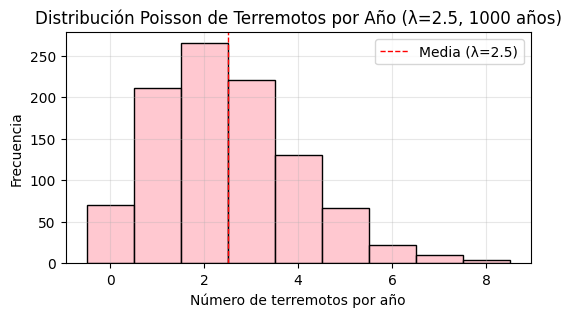


Estadísticas descriptivas
--------------------------
Media: 2.49
Varianza: 2.34
Máximo: 8
Mínimo: 0


In [4]:
# Parte 1: Simulación de distribución Poisson para terremotos

# Importamos libre rias necesarias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson

# Definimos nuestros parámetros
lambda_ = 2.5  # tasa promedio de terremotos por año
sample_size = 1000  # número de años a simular
# Simulación Poisson
poisson = np.random.poisson(lambda_, sample_size)

# Generamos el gráfico para la visualización
plt.figure(figsize=(6, 3))
sns.histplot(poisson, kde=False, discrete=True, color='Lightpink')
plt.title('Distribución Poisson de Terremotos por Año (λ=2.5, 1000 años)')
plt.xlabel('Número de terremotos por año')
plt.ylabel('Frecuencia')
plt.axvline(lambda_, color='red', linestyle='dashed', linewidth=1, label=f'Media (λ={lambda_})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
    
# Estadísticas descriptivas
print("\nEstadísticas descriptivas")
print('--------------------------')
print(f"Media: {np.mean(poisson):.2f}")
print(f"Varianza: {np.var(poisson):.2f}")
print(f"Máximo: {np.max(poisson)}")
print(f"Mínimo: {np.min(poisson)}")

**Parte 2.** Usa el set de datos marketing_campaign.csv y realiza una prueba de hipótesis para contrastar si el número de compras en línea (NumWebPurchases) tiene alguna relevancia con el número de visitas a la página web (NumWebVisitsMonth). 

Agrupa la información en dos categorías: clientes con alto número de visitas (> 5) y bajo número de visitas (≤ 5). Realiza una prueba ANOVA para este análisis.

In [3]:
# Empezamos por importar las librerias a usar
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Cargamos el archivo CSV
df = pd.read_csv('marketing_campaign.csv')

# Inspeccionamos los datos para ver si debemos trabajarla previemente
print(df.info())
print(df.isnull().sum())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
# En la lectura de los datos detectamos 24 datos faltantes
# Para el manejar valores faltantes opto por sacar la media y sustituir los valores faltantes
df['Income'].fillna(df['Income'].median(), inplace=True)
print(df.isnull().sum())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


/tmp/ipykernel_3269/1928097733.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


In [6]:
# Eliminar duplicados y después verificamos cuantos datos duplucados teníamos
df.drop_duplicates(inplace=True)

# Contamos el número de filas después de eliminar duplicados (Original 2240)
filas_despues = len(df)
print(f"Número de filas después de eliminar duplicados: {filas_despues}")

Número de filas después de eliminar duplicados: 2240


In [18]:
# Empezamos por la prueba de correlación entre compras en línea y visitas a la web
print("\nPrueba de correlación entre NumWebPurchases y NumWebVisitsMonth:")
corr, p_value = stats.pearsonr(df['NumWebPurchases'], df['NumWebVisitsMonth'])
print(f"Coeficiente de correlación: {corr:.3f}")
print(f"Valor p: {p_value:.4f}")
    
if p_value < 0.05: print("Hay una correlación estadísticamente significativa entre las variables.")
else: print("No hay evidencia de correlación significativa entre las variables.")
 


Prueba de correlación entre NumWebPurchases y NumWebVisitsMonth:
Coeficiente de correlación: -0.056
Valor p: 0.0082
Hay una correlación estadísticamente significativa entre las variables.


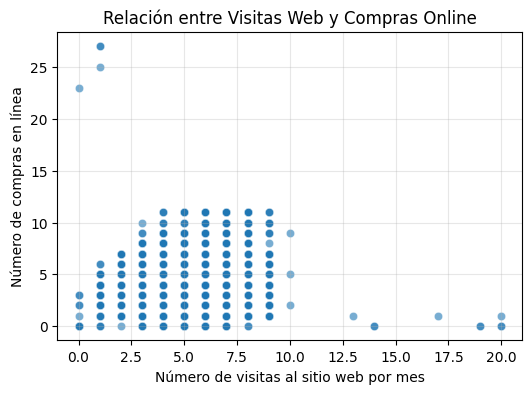

In [20]:
# Ahora generamos el grafico para la visualización de la relación
plt.figure(figsize=(6, 4))
sns.scatterplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=df, alpha=0.6)
plt.title('Relación entre Visitas Web y Compras Online')
plt.xlabel('Número de visitas al sitio web por mes')
plt.ylabel('Número de compras en línea')
plt.grid(True, alpha=0.3)
plt.show()    

In [28]:
#  Prueba ANOVA entre grupos de visitas
print("\nPrueba ANOVA entre grupos de visitas web:")
    
# Creamos los grupos (alto contra bajo número de visitas)
df['VisitGroup'] = np.where(df['NumWebVisitsMonth'] > 5, 'Alto', 'Bajo')
    
# Estadísticas descriptivas por grupo
print("\nEstadísticas descriptivas por grupo:")
print(df.groupby('VisitGroup')['NumWebPurchases'].describe())


Prueba ANOVA entre grupos de visitas web:

Estadísticas descriptivas por grupo:
             count      mean       std  min  25%  50%  75%   max
VisitGroup                                                      
Alto        1170.0  3.921368  2.897857  0.0  2.0  3.0  6.0  11.0
Bajo        1070.0  4.263551  2.632047  0.0  2.0  4.0  6.0  27.0


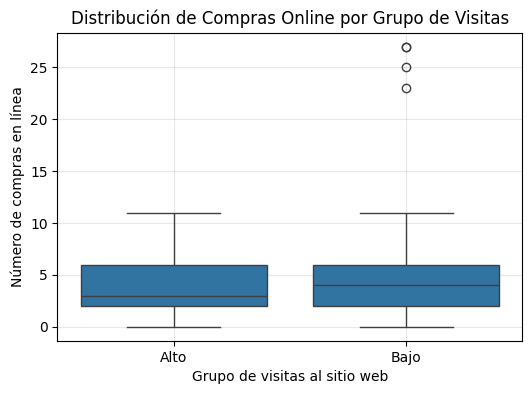

In [29]:
# Genero un BoxPlot para visualizarlo gráficamente
plt.figure(figsize=(6, 4))
sns.boxplot(x='VisitGroup', y='NumWebPurchases', data=df)
plt.title('Distribución de Compras Online por Grupo de Visitas')
plt.xlabel('Grupo de visitas al sitio web')
plt.ylabel('Número de compras en línea')
plt.grid(True, alpha=0.3)
plt.show()

In [30]:
# Generamos una tabla ANOVA
model = ols('NumWebPurchases ~ C(VisitGroup)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nTabla ANOVA:")
print(anova_table)
    
if anova_table['PR(>F)'][0] < 0.05: print("\nHay diferencias significativas entre los grupos (p < 0.05).")
else: print("\nNo hay diferencias significativas entre los grupos (p > 0.05).")


Tabla ANOVA:
                     sum_sq      df         F   PR(>F)
C(VisitGroup)     65.439612     1.0  8.503662  0.00358
Residual       17222.444317  2238.0       NaN      NaN

Hay diferencias significativas entre los grupos (p < 0.05).


/tmp/ipykernel_3269/687820611.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05: print("\nHay diferencias significativas entre los grupos (p < 0.05).")
